# Diabetes Prediction Using Random Forest Classifier


### Dataset Overview

The dataset used in this project contains information related to diabetes patients and various medical predictor variables. It was obtained from Kaggle and is available in the [Diabetes Healthcare Comprehensive Dataset](https://www.kaggle.com/datasets/deependraverma13/diabetes-healthcare-comprehensive-dataset). The dataset includes the following columns:

1. **Pregnancies**: Number of times pregnant
2. **Glucose**: Plasma glucose concentration in an oral glucose tolerance test
3. **BloodPressure**: Diastolic blood pressure (mm Hg)
4. **SkinThickness**: Triceps skinfold thickness (mm)
5. **Insulin**: Two-hour serum insulin
6. **BMI**: Body Mass Index
7. **DiabetesPedigreeFunction**: Diabetes pedigree function
8. **Age**: Age in years
9. **Outcome**: Class variable indicating whether a patient has diabetes (1) or not (0)

### Project Objective

The objective of this project is to develop a machine learning model that can accurately predict whether a patient has diabetes based on the provided diagnostic measurements. This predictive model will be trained using the available dataset and will aim to assist healthcare professionals in diagnosing diabetes early and effectively.



#### Data Loading

In [57]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import joblib
import warnings
warnings.filterwarnings('ignore')


In [25]:
# Reading in the dataset'
data = pd.read_csv('/home/paulet/Documents/projects/diabetesdata/data/health care diabetes.csv')


In [26]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Statistical Summary


These statistics provide insights into the central tendency, dispersion, and distribution of each variable in the dataset.

In [27]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


1. **Pregnancies**:
   - **Mean**: The average number of pregnancies for individuals with diabetes is approximately 3.85. This indicates that, on average, individuals with diabetes have had around 4 pregnancies.
   - **Standard Deviation**: The standard deviation of approximately 3.37 suggests that there is variability in the number of pregnancies among individuals with diabetes, with some having fewer and others having more pregnancies than the average.

2. **Glucose**:
   - **Mean**: The average plasma glucose concentration for individuals with diabetes is approximately 120.89 mg/dL. This represents the typical blood glucose level for this population.
   - **Standard Deviation**: The standard deviation of approximately 31.97 indicates the variability in glucose levels among individuals with diabetes, with some having higher or lower levels than the average.

3. **BloodPressure**:
   - **Mean**: The average diastolic blood pressure for individuals with diabetes is approximately 69.11 mm Hg. This represents the typical blood pressure reading for this population.
   - **Standard Deviation**: The standard deviation of approximately 19.36 suggests variability in blood pressure levels among individuals with diabetes, with some having higher or lower blood pressure than the average.

4. **SkinThickness**:
   - **Mean**: The average triceps skinfold thickness for individuals with diabetes is approximately 20.54 mm. This indicates the typical skin thickness measurement for this population.
   - **Standard Deviation**: The standard deviation of approximately 15.95 suggests variability in skinfold thickness among individuals with diabetes, with some having thicker or thinner skinfold measurements than the average.

5. **Insulin**:
   - **Mean**: The average two-hour serum insulin level for individuals with diabetes is approximately 79.80 μU/ml. This represents the typical insulin level for this population.
   - **Standard Deviation**: The standard deviation of approximately 115.24 suggests variability in insulin levels among individuals with diabetes, with some having higher or lower insulin levels than the average.

6. **BMI**:
   - **Mean**: The average Body Mass Index (BMI) for individuals with diabetes is approximately 31.99 kg/m². This represents the typical BMI for this population.
   - **Standard Deviation**: The standard deviation of approximately 7.88 indicates variability in BMI among individuals with diabetes, with some having higher or lower BMIs than the average.

7. **DiabetesPedigreeFunction**:
   - **Mean**: The average diabetes pedigree function for individuals with diabetes is approximately 0.47. This represents the typical value of this function for this population.
   - **Standard Deviation**: The standard deviation of approximately 0.33 suggests variability in the diabetes pedigree function among individuals with diabetes, with some having higher or lower values than the average.

8. **Age**:
   - **Mean**: The average age of individuals with diabetes is approximately 33.24 years. This represents the typical age for this population.
   - **Standard Deviation**: The standard deviation of approximately 11.76 indicates variability in age among individuals with diabetes, with some being younger or older than the average.

9. **Outcome**:
   - **Mean**: The average outcome value (indicating presence or absence of diabetes) for individuals with diabetes is approximately 0.35. This suggests that, on average, around 35% of individuals in this population have diabetes.
   - **Standard Deviation**: The standard deviation of approximately 0.48 indicates variability in the outcome (presence or absence of diabetes) among individuals with diabetes, with some populations having a higher or lower prevalence of diabetes than the average.


## Data Pre-processing

In [28]:
missing_values_count = data.isnull().sum()

There are no missing values as per the dataset

In [39]:
# Handle NaN values
imputer = SimpleImputer(strategy='mean')
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = imputer.fit_transform(data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']])

Imputer handles Nan Values that are undefined

## Data Exploration and Visualizations

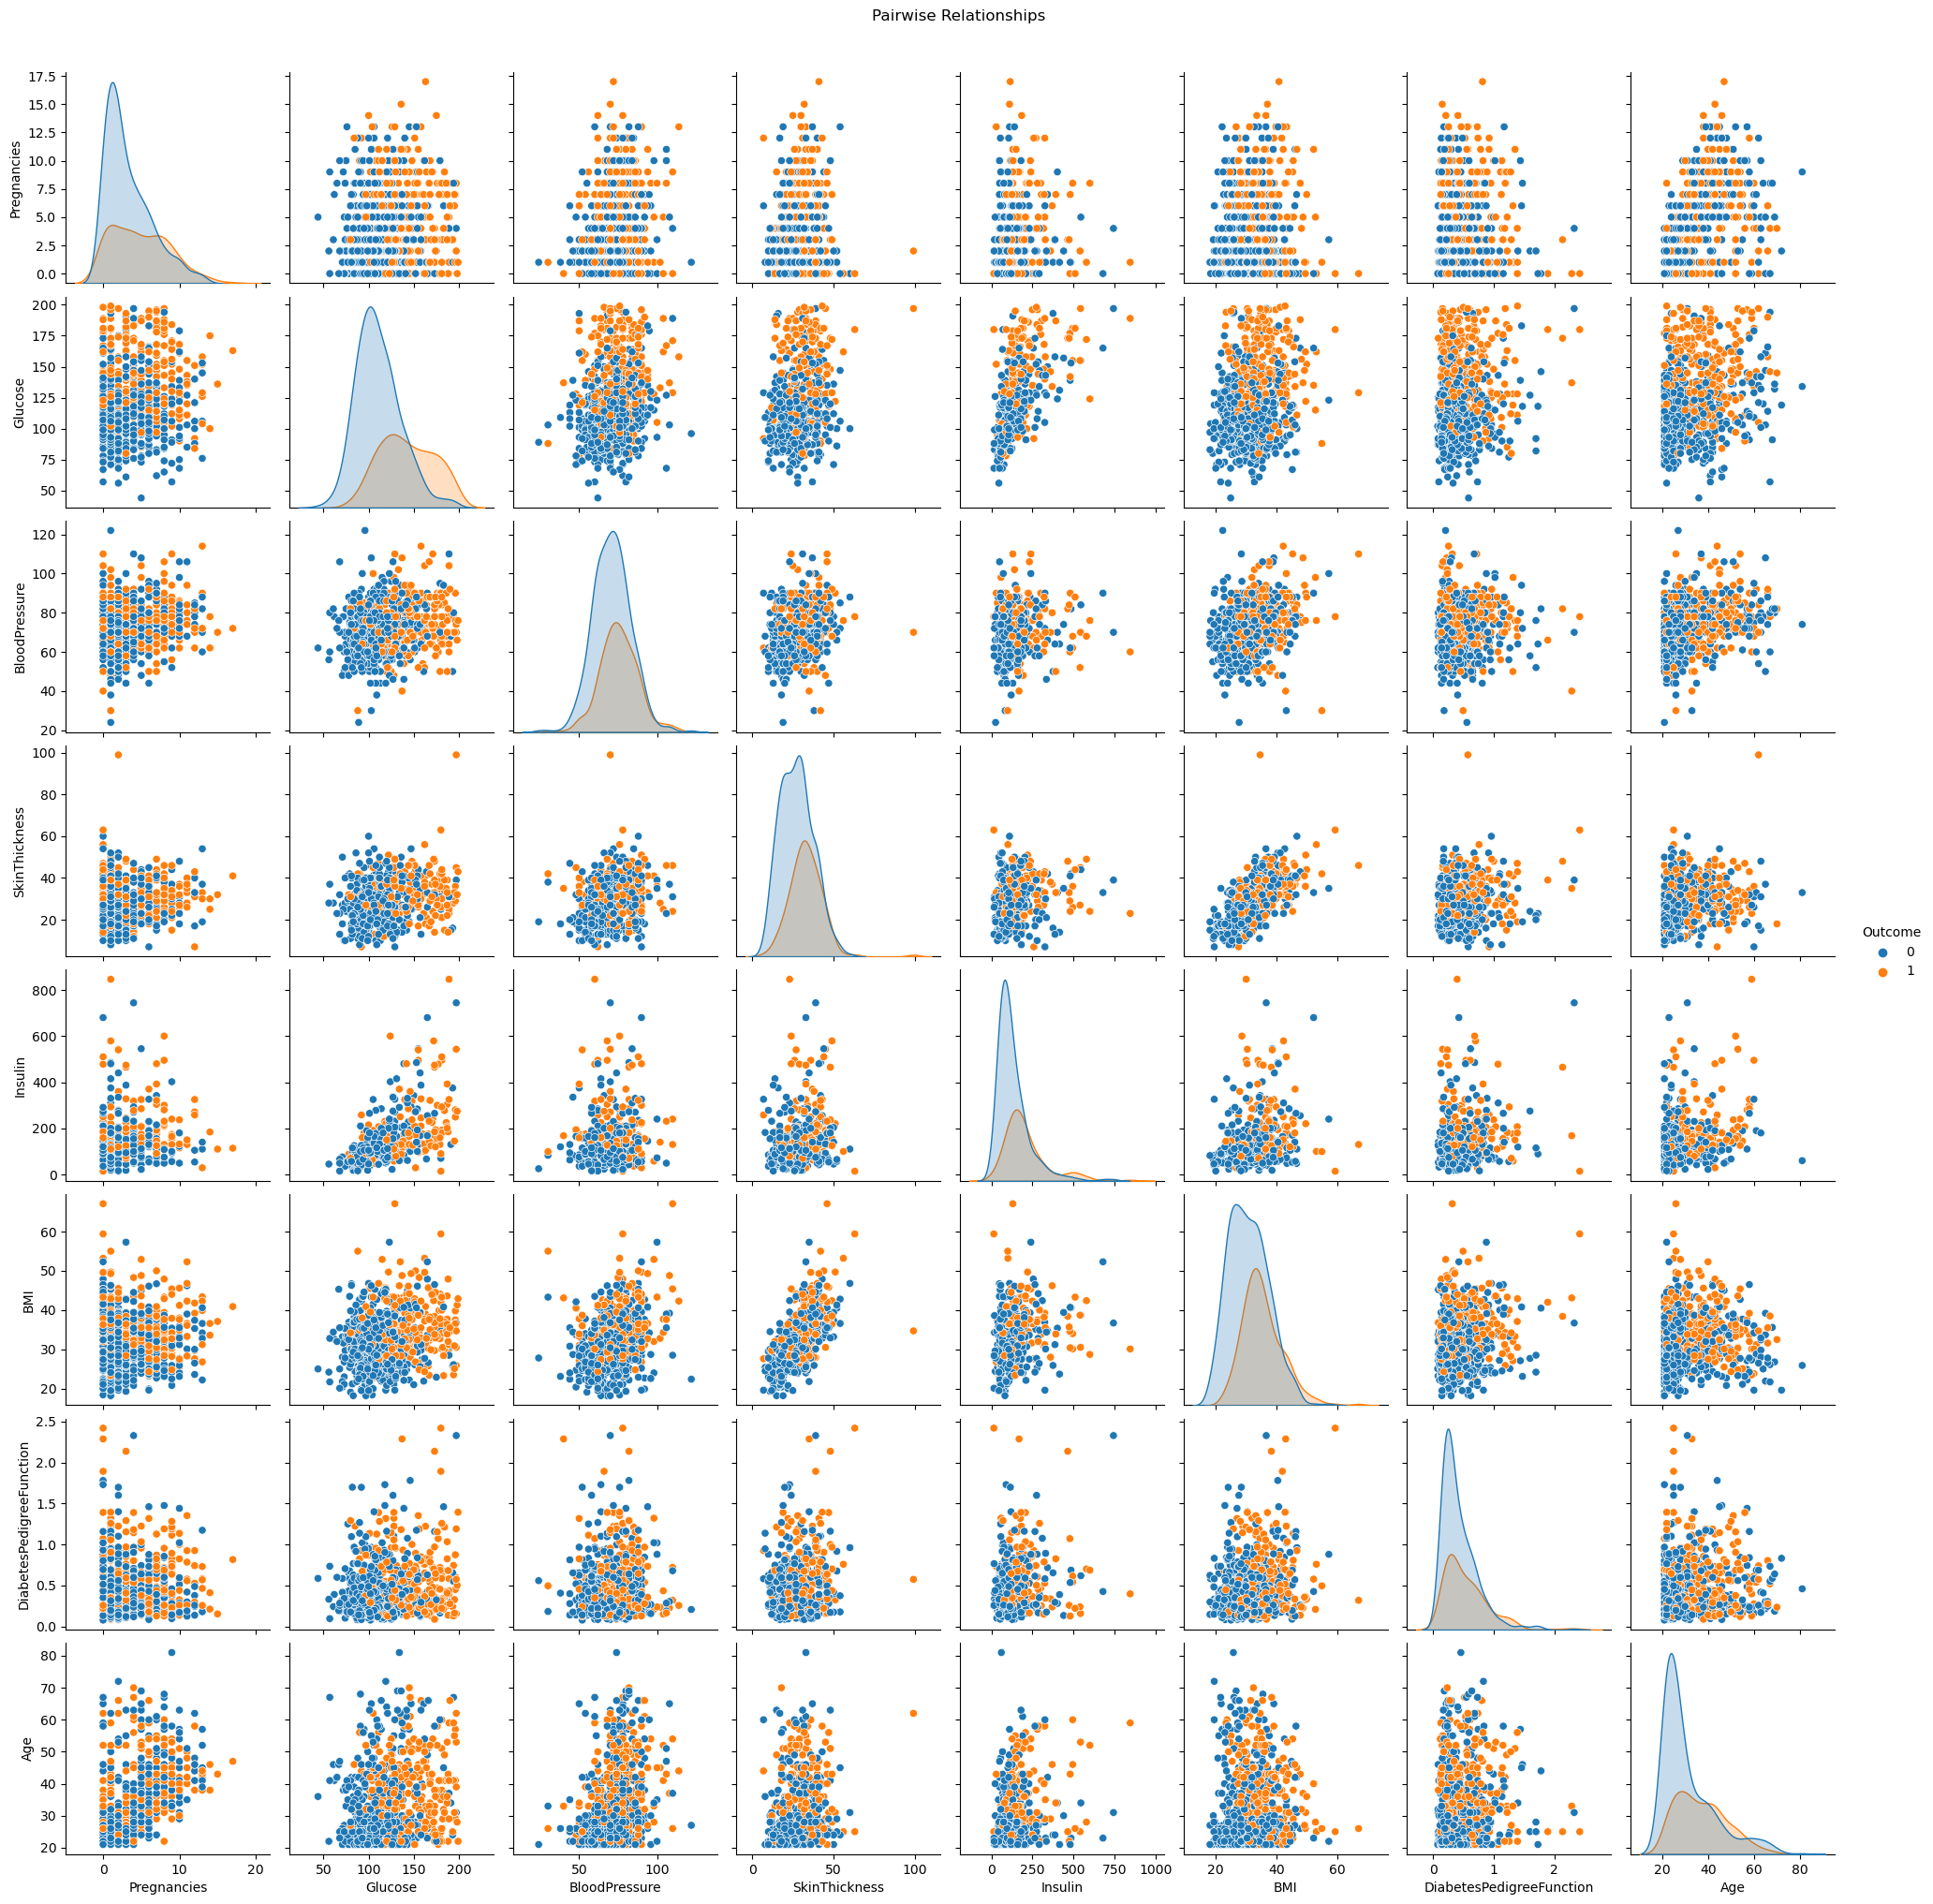

In [17]:
# Pairwise Relationships
sns.pairplot(data, hue='Outcome', diag_kind='kde')
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

#### Pairwise Relationship Analysis: Exploring Diabetes Risk Factors
##### Overview

In this analysis, we explore the pairwise relationships between variables in our dataset to understand potential risk factors for diabetes.

| Variable Pair        | Domain Insight                                     | Observation                                                                |
|----------------------|----------------------------------------------------|---------------------------------------------------------------------------|
| Glucose vs. Outcome  | Elevated glucose levels are a hallmark of diabetes | Positive correlation between glucose levels and diabetes outcome          |
| BMI vs. Outcome      | Obesity is strongly linked to type 2 diabetes     | Higher BMI values associated with increased likelihood of diabetes        |
| Age vs. Outcome      | Age is a non-modifiable risk factor for diabetes  | Older individuals more likely to have diabetes                            |
| Blood Pressure vs. Outcome | Hypertension is a common comorbidity in diabetes | Relationship may vary, elevated blood pressure levels may indicate increased risk |
| Insulin vs. Glucose  | Insulin resistance is central to type 2 diabetes  | Positive correlation suggests potential insulin resistance                 |
| Pregnancy vs. Outcome| Pregnancy history may influence diabetes risk     | Relationship with diabetes risk requires further investigation              |

##### Conclusion

The pairwise analysis reveals potential risk factors for diabetes, including elevated glucose levels, higher BMI, advanced age, and possibly hypertension and insulin resistance.

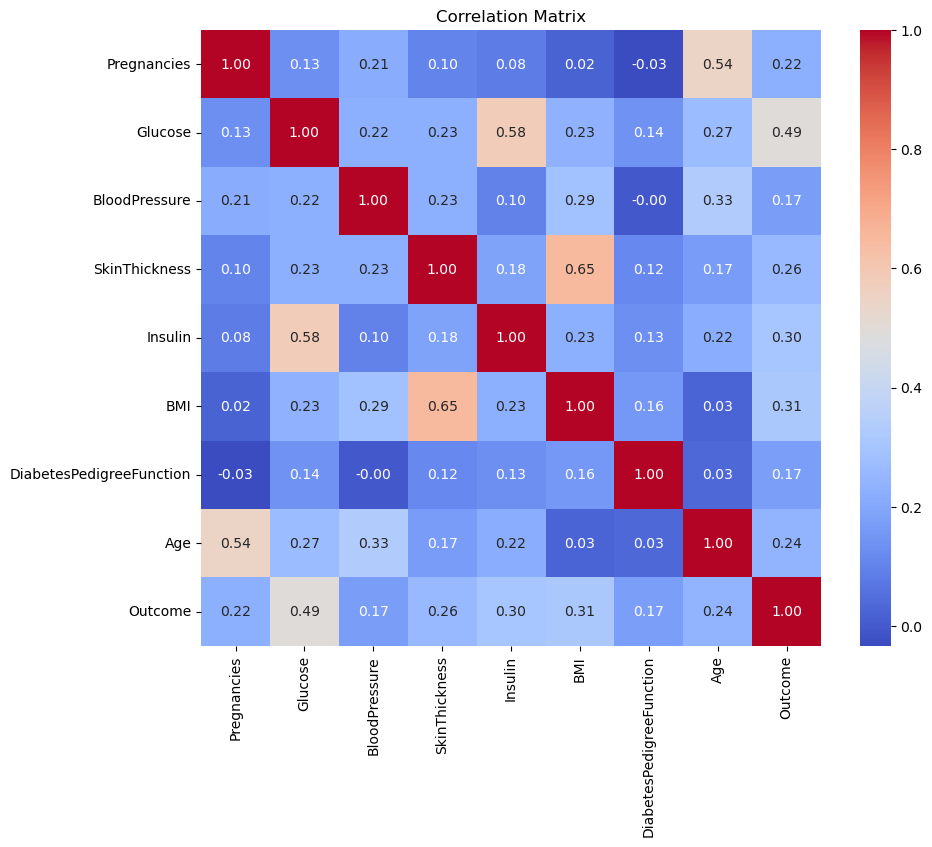

In [18]:
# Correlation Analysis
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

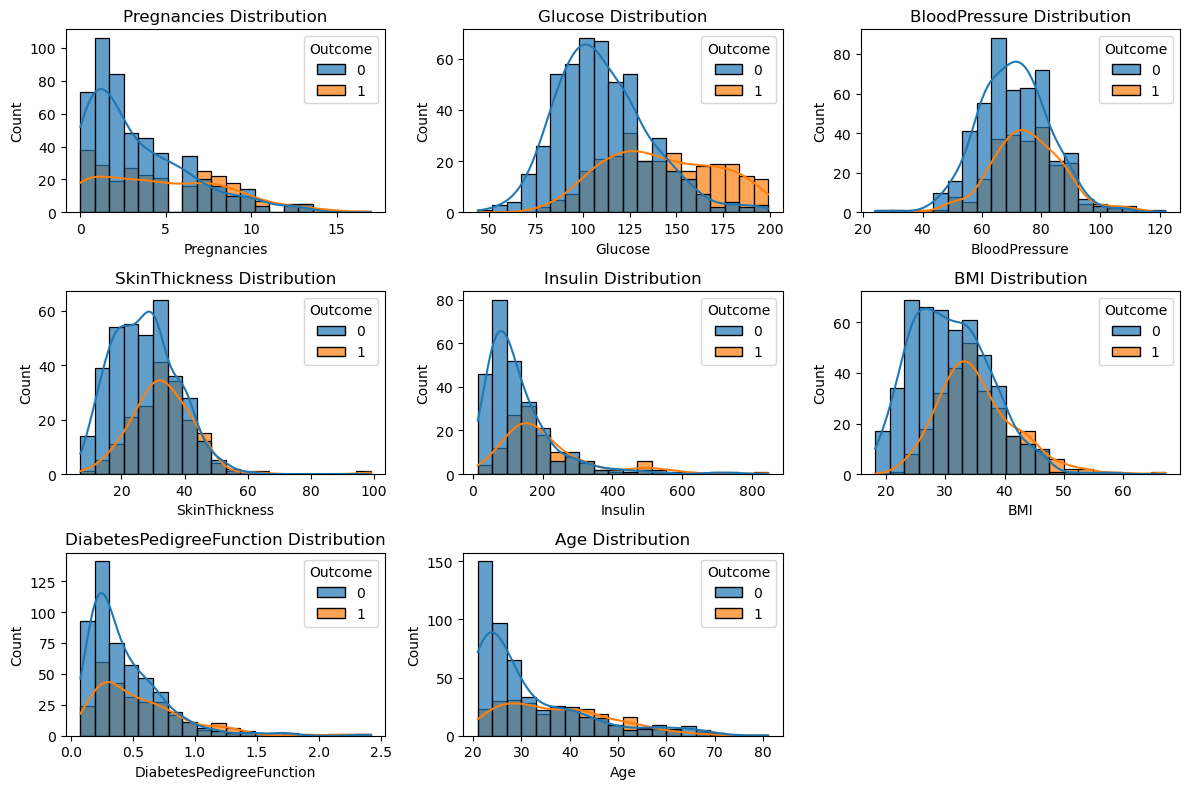

In [19]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(data.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.histplot(data=data, x=column, hue='Outcome', kde=True, bins=20, alpha=0.7)
    plt.title(f'{column} Distribution')
plt.tight_layout()
plt.show()

## Data Balance 

In [42]:
class_counts = data['Outcome'].value_counts()
print("Class Counts:")
print(class_counts)


Class Counts:
0    500
1    268
Name: Outcome, dtype: int64


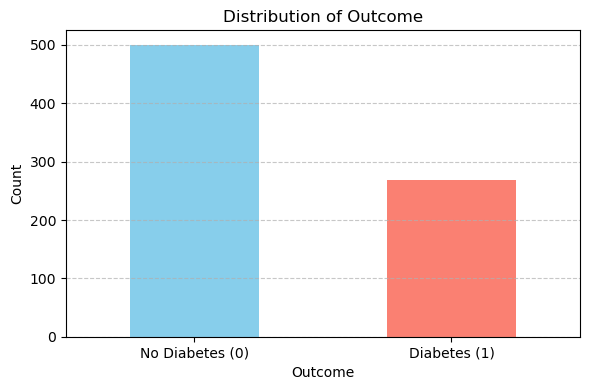

In [41]:
# barplot of column outcome
plt.figure(figsize=(6, 4))
data['Outcome'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Outcome')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Diabetes (0)', 'Diabetes (1)'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Class Distribution Interpretation:

The class distribution plot illustrates the imbalance between the two classes in the target variable 'Outcome' (0 and 1), where:
- Class 0 (No Diabetes) has a count of 500 instances.
- Class 1 (Diabetes) has a count of 268 instances.

This significant class imbalance could potentially impact the performance of machine learning models, as the minority class (Diabetes) is underrepresented compared to the majority class (No Diabetes). Model training may lean towards predicting the majority class more frequently, leading to reduced sensitivity or recall for the minority class.

## Data Modelling

In [44]:
# Splitting data into features and target variable
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [47]:
# Using SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

Using SMOTE to handle the imbalance 

In [48]:
# Splitting the  data 
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [49]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Data Modeling Interpretation:

In the data modeling step, we applied the Synthetic Minority Over-sampling Technique (SMOTE) to address the class imbalance in the dataset. By oversampling the minority class (Diabetes), SMOTE generated synthetic samples to balance the class distribution. 

The resampled dataset (X_resampled and y_resampled) now contains balanced class distributions, which will help mitigate the risk of bias towards the majority class during model training. 

With a balanced dataset we proceed to split the data into training and testing sets and train our machine learning models, knowing that they have been trained on representative samples from both classes.



### Training model

In [50]:
# Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [58]:
# Saving the trained model to a file
model_path = "models/random_forest_model.pkl"
joblib.dump(rf_classifier, model_path)

['models/random_forest_model.pkl']

In [51]:
# Predicting
y_pred = rf_classifier.predict(X_test_scaled)

## Model Evaluation

In [52]:
# Model evaluation
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.77      0.82        99
           1       0.80      0.89      0.84       101

    accuracy                           0.83       200
   macro avg       0.84      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200



#### Classification Report Interpretation:

#### Interpretation:

- The model demonstrates relatively high precision and recall values for both classes, indicating a good balance between minimizing false positives and false negatives.
- However, the model shows slightly higher recall for class 1 (Diabetes), suggesting that it is better at identifying individuals with diabetes than those without.
- The weighted average F1-score of 0.83 indicates overall good performance across both classes.
- With an accuracy of 0.83, the model correctly predicts the diabetes status for 83% of the instances in the dataset.


In [53]:
# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, rf_classifier.predict_proba(X_test_scaled)[:,1])
print('ROC AUC Score:', roc_auc)

ROC AUC Score: 0.8857885788578858


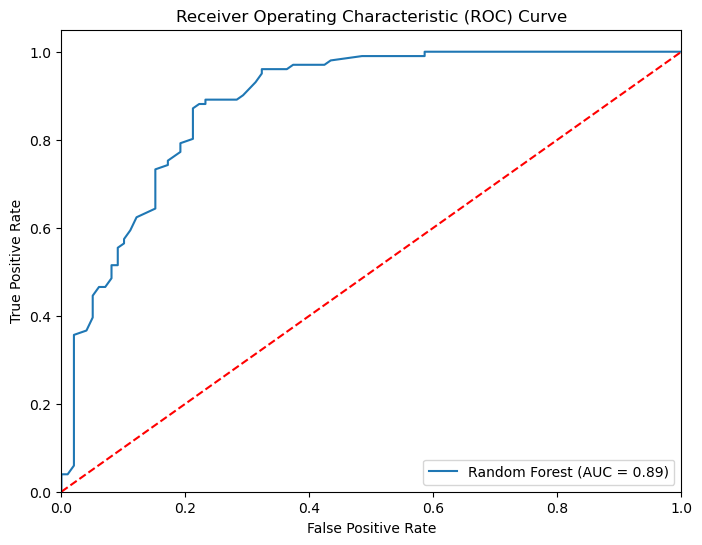

In [54]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf_classifier.predict_proba(X_test_scaled)[:,1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Random Forest (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### Interpretation of ROC AUC Score:

The ROC AUC score of 0.885 indicates the performance of our diabetes detection model in distinguishing between individuals with diabetes and those without, based on their predicted probabilities.

- **ROC AUC Score**: 0.885
  - The Receiver Operating Characteristic (ROC) curve evaluates the trade-off between sensitivity (true positive rate) and specificity (true negative rate) at various threshold settings.
  - The Area Under the ROC Curve (AUC) measures the model's ability to rank positive instances higher than negative instances across all possible thresholds.
  
This ROC AUC score of 0.885 suggests that our model has a strong discriminatory power. Specifically, it indicates that when given a randomly chosen pair of individuals – one with diabetes and one without – our model will correctly assign a higher probability of having diabetes to the individual with diabetes in approximately 88.6% of cases.

In the context of diabetes detection, a high ROC AUC score is essential as it reflects the model's ability to accurately identify individuals with diabetes while minimizing false positives. This is crucial for clinical decision-making and ensuring that individuals at risk receive appropriate interventions and care.


## Conclusion

Completing this project has been an enriching journey filled with discovery and learning. 
